# Income Prediction 

### Loading libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold

## 1. Business Problem 

Census data is vested with demographic information about a country or a section. In order to paint a picture from it for a layman to understand, the data must be analysed. One such analysis question to know whether a particular citizen earns a high income or not? This is the problem raised in the research from 1994's census database. It aims to predict whether an adult makes more than $50K a year or not through the outcome variable, income. 

## 2. About the dataset

The dataset is from the 1994 Census data. The classification goal is to predict if the individual earns a high income (>50K) or not. The file chosen has 32561 rows and 15 columns (14 features of the census data and 1 outcome variable). There are no missing values. 

Before processing the dataset to check for the datatypes understood by Python, the following are their dataypes by virtue of the nature of the definition. 

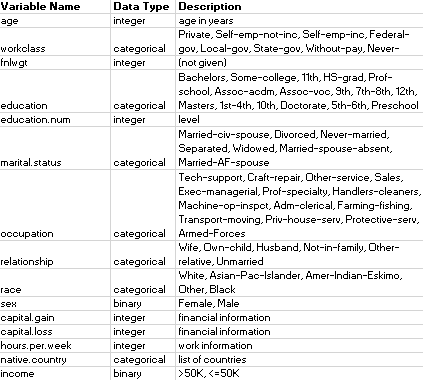

## 3.1. Importing the dataset

In [4]:
dataset_name = input('Name of the dataset: ')

Name of the dataset: high_income.csv


In [5]:
def read_csv(dataset_name):
    original_data = pd.read_csv(dataset_name, sep = ',', header = 0, na_values='?')
    return original_data

## 3.2. Dimensions of the dataset

In [6]:
def dimensions(dataset_name):
    dim = read_csv(dataset_name).shape
    return dim

In [7]:
dimensions(dataset_name)

(32561, 15)

## 4. Conversion of datatypes of variables

### 4.1. Original datatypes of the variables from Python

In [8]:
def data_types(dataset_name):
    return read_csv(dataset_name).dtypes

In [9]:
data_types(dataset_name)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

### 4.2. Conversion of datatypes through Label Encoding

In [10]:
def preprocess_data(dataset_name):
    data = read_csv(dataset_name)
    
    for col in data.columns:
        if data[col].dtype == 'object' or data[col].dtype == 'bool':
            mode_val = data[col].mode()[0]
            data[col].fillna(mode_val, inplace=True)
    
    label_encoder = LabelEncoder()
    for col in data.columns:
        if data[col].dtype == 'object' or data[col].dtype == 'bool':
            data[col] = label_encoder.fit_transform(data[col])
    
    return data

In [11]:
preprocess_data(dataset_name).dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int32
income            int32
dtype: object

In this dataset, the variables detected as object are converted to integer. Missing values have also been handled.

## 5. Missing Values Detection

In [12]:
def missing_vals(dataset_name):
    return preprocess_data(dataset_name).isna().sum()

In [13]:
missing_vals(dataset_name)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

There are no missing values in this dataset anymore.

## 6. Descriptive Summary Stats of Dataset

In [14]:
def descr(dataset_name):
    return preprocess_data(dataset_name).describe().applymap('{:.2f}'.format)

In [15]:
descr(dataset_name)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,3.09,189778.37,10.30,10.08,2.61,6.14,1.45,3.67,0.67,1077.65,87.30,40.44,36.42,0.24
std,13.64,1.11,105549.98,3.87,2.57,1.51,3.97,1.61,0.85,0.47,7385.29,402.96,12.35,6.06,0.43
min,17.00,0.00,12285.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,28.00,3.00,117827.00,9.00,9.00,2.00,3.00,0.00,4.00,0.00,0.00,0.00,40.00,38.00,0.00
50%,37.00,3.00,178356.00,11.00,10.00,2.00,6.00,1.00,4.00,1.00,0.00,0.00,40.00,38.00,0.00
75%,48.00,3.00,237051.00,12.00,12.00,4.00,9.00,3.00,4.00,1.00,0.00,0.00,45.00,38.00,0.00
max,90.00,7.00,1484705.00,15.00,16.00,6.00,13.00,5.00,4.00,1.00,99999.00,4356.00,99.00,40.00,1.00


### 6.1. Interpretation of Summary Stats

Some information extracted from the summary table is as follows:

1) The mean age of an individual in this census data is about 38 years; while the youngest and eldest are 17 and 90, respectively. 

2) All of the quartiles imply that capital gain and capital loss can be 0. However, both the capital gain and loss' maximum values are much greater than what 75% of the population is facing. So outliers can be expected.

3) Almost half the population of this study work 40 hours per week. 

## 7. Boxplots

In [16]:
def extract_numeric_cols(dataset_name):
    return preprocess_data(dataset_name).select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

In [17]:
extract_numeric_cols(dataset_name)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

### 7.1. Boxplots Generation

In [18]:
def boxplots(dataset_name):
    numeric_columns = extract_numeric_cols(dataset_name)
    fig, axs = plt.subplots(1, len(numeric_columns), figsize=(30, 16))

    for i, col in enumerate(numeric_columns):
        axs[i].boxplot(preprocess_data(dataset_name)[col])
        axs[i].set_title(col)

    plt.tight_layout()
    plt.show()

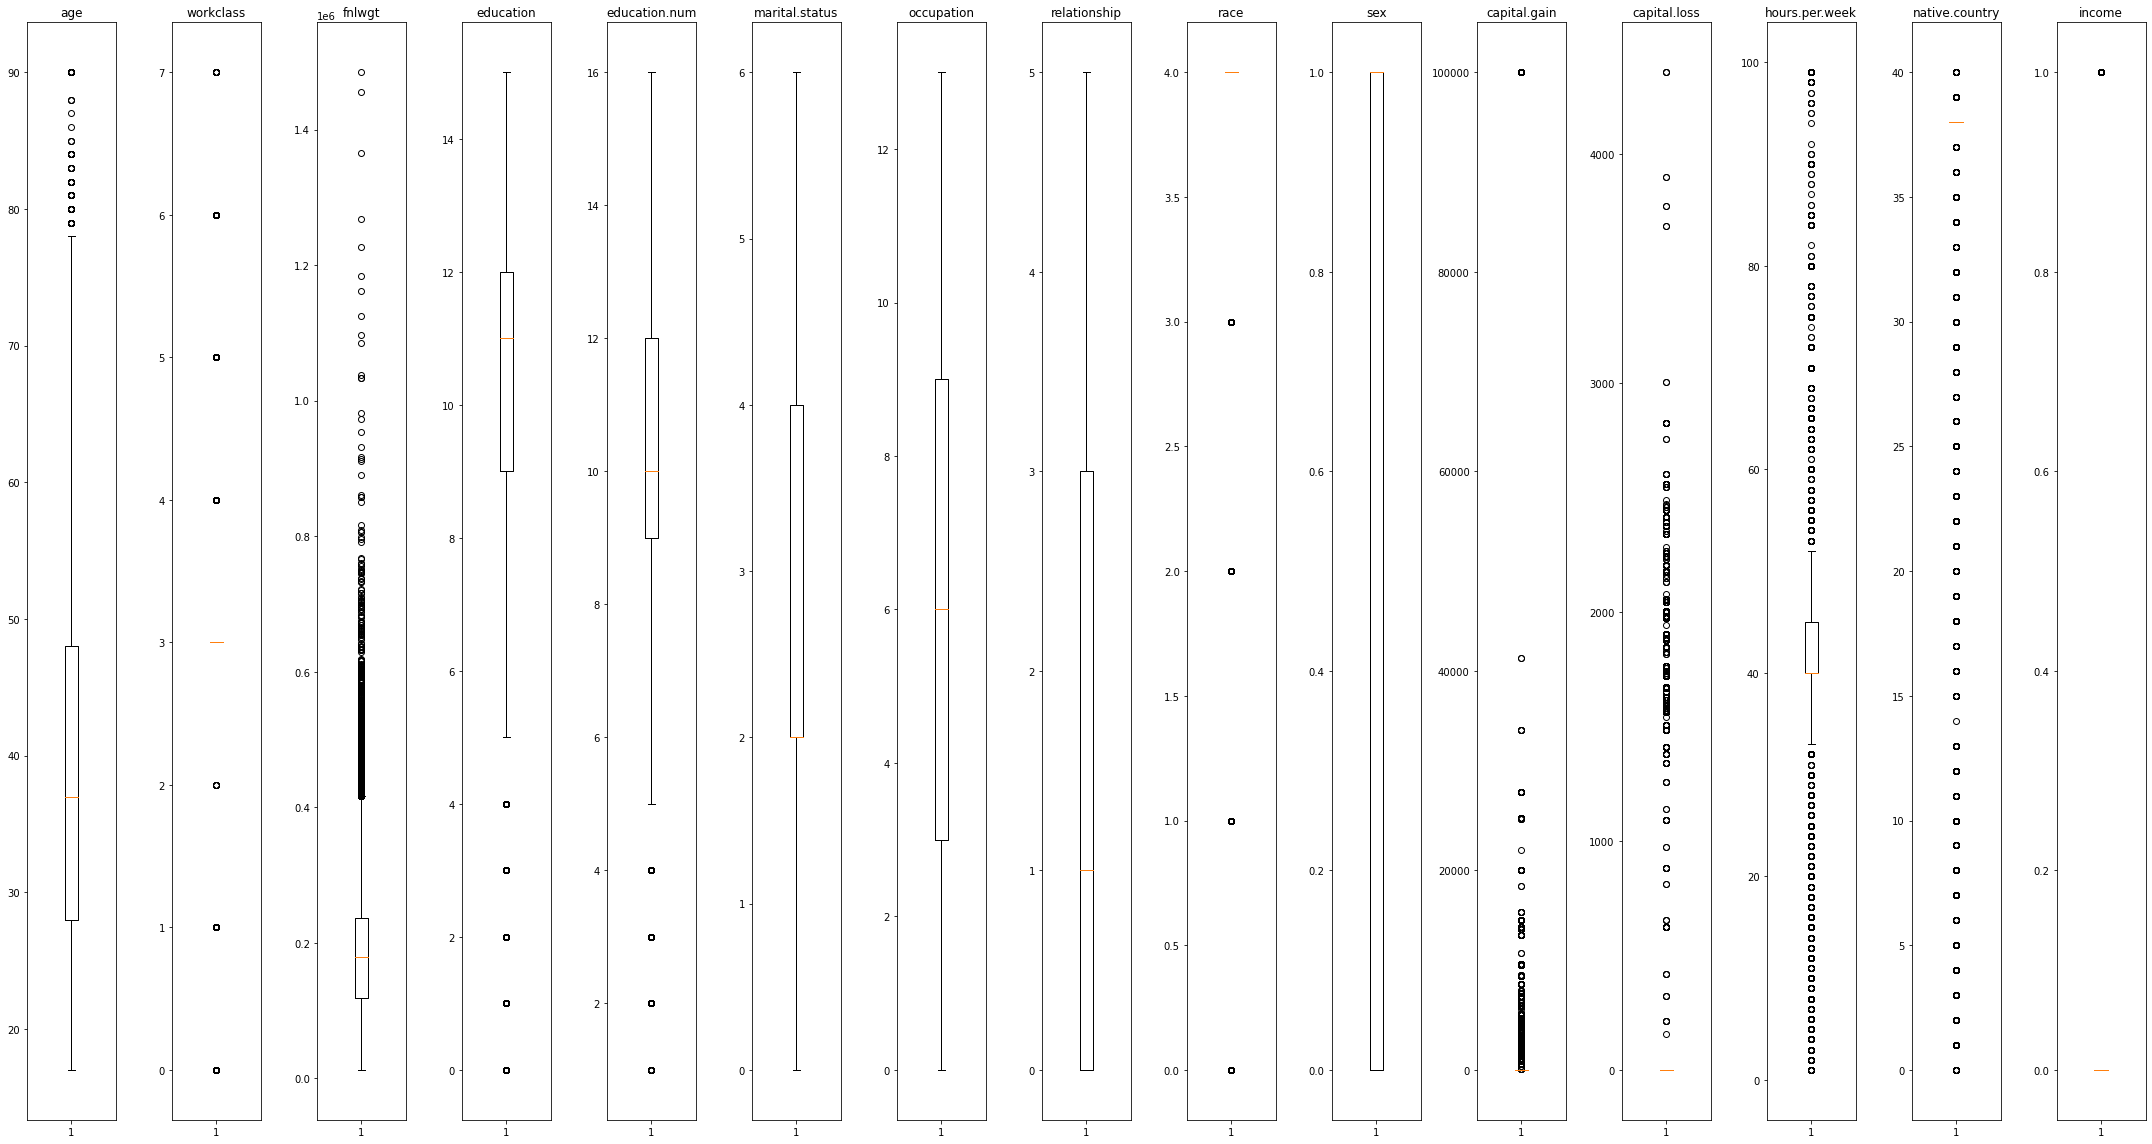

In [19]:
boxplots(dataset_name)

### 7.1.1. Interpretation of Boxplots

As expected, there are outliers present in the capital gain and loss columns as well as hours per week.

1) The hours per week distribution is extremely platykurtic, but outliers exist beyond both the lower and upper whisker ends. 

2) The age column is fairly normally distributed. 

3) The capital gain and loss boxplots are not visible as all of the quartiles rested at 0 and outliers bombard it atop. 

### 7.2. Boxplot Stats

In [20]:
def boxplot_stats(dataset_name):
    column_names = extract_numeric_cols(dataset_name)
    boxplot_stats_list = []
    for column_name in column_names:

        minimum = min(preprocess_data(dataset_name)[column_name])
        maximum = max(preprocess_data(dataset_name)[column_name])
        
        q1 = np.percentile(preprocess_data(dataset_name)[column_name], 25)
        q2 = np.percentile(preprocess_data(dataset_name)[column_name], 50)
        q3 = np.percentile(preprocess_data(dataset_name)[column_name], 75)

        iqr = q3 - q1

        whisker_low = q1 - 1.5 * iqr
        whisker_high = q3 + 1.5 * iqr

        boxplot_stats_list.append({
            'column_name': column_name,
            'whisker_low': whisker_low,
            'min': minimum,
            'q1': q1,
            'q2': q2,
            'q3': q3,
            'whisker_high': whisker_high,
            'max': maximum,
            'iqr': iqr
        })
        
    boxplot_stats_df = pd.DataFrame(boxplot_stats_list).set_index('column_name')
    return boxplot_stats_df.applymap('{:.2f}'.format)

In [21]:
boxplot_stats(dataset_name)

,whisker_low,min,q1,q2,q3,whisker_high,max,iqr
column_name,,,,,,,,
age,-2.00,17.00,28.00,37.00,48.00,78.00,90.00,20.00
workclass,3.00,0.00,3.00,3.00,3.00,3.00,7.00,0.00
fnlwgt,-61009.00,12285.00,117827.00,178356.00,237051.00,415887.00,1484705.00,119224.00
education,4.50,0.00,9.00,11.00,12.00,16.50,15.00,3.00
education.num,4.50,1.00,9.00,10.00,12.00,16.50,16.00,3.00
marital.status,-1.00,0.00,2.00,2.00,4.00,7.00,6.00,2.00
occupation,-6.00,0.00,3.00,6.00,9.00,18.00,13.00,6.00
relationship,-4.50,0.00,0.00,1.00,3.00,7.50,5.00,3.00
race,4.00,0.00,4.00,4.00,4.00,4.00,4.00,0.00


It is clear that all the true numeric variables have datapoints that fall outside of the IQR which was identified from the boxplots as well.

### Class Variable Name

In [22]:
def class_var_name():
    class_variable = input('What is the name of the class column? ')
    return class_variable

In [23]:
class_variable = class_var_name()

What is the name of the class column? income


## 8. Bar and Frequency plots

In [24]:
def cols_for_freq_plots():
    columns_list = input('Enter column names separated by commas: ').split(', ')
    return columns_list

In [25]:
cols_for_freq_plots = cols_for_freq_plots()

Enter column names separated by commas: marital.status, occupation, race, sex, income


In [26]:
def frequency_plots(dataset_name, class_variable, cols_for_freq_plots):
    dataset = read_csv(dataset_name)
    num_plots = len(cols_for_freq_plots)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6*num_rows))

    if num_rows == 1:
        axes = [axes]
    
    for idx, col in enumerate(cols_for_freq_plots):
        row_idx = idx // num_cols
        col_idx = idx % num_cols
        
        ax = axes[row_idx][col_idx]

        sns.countplot(x=col, data=dataset, ax=ax)
        ax.set_title(f'Frequency Plot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        
        ax.tick_params(axis='x', rotation=90)
        
    plt.tight_layout()
    plt.show()

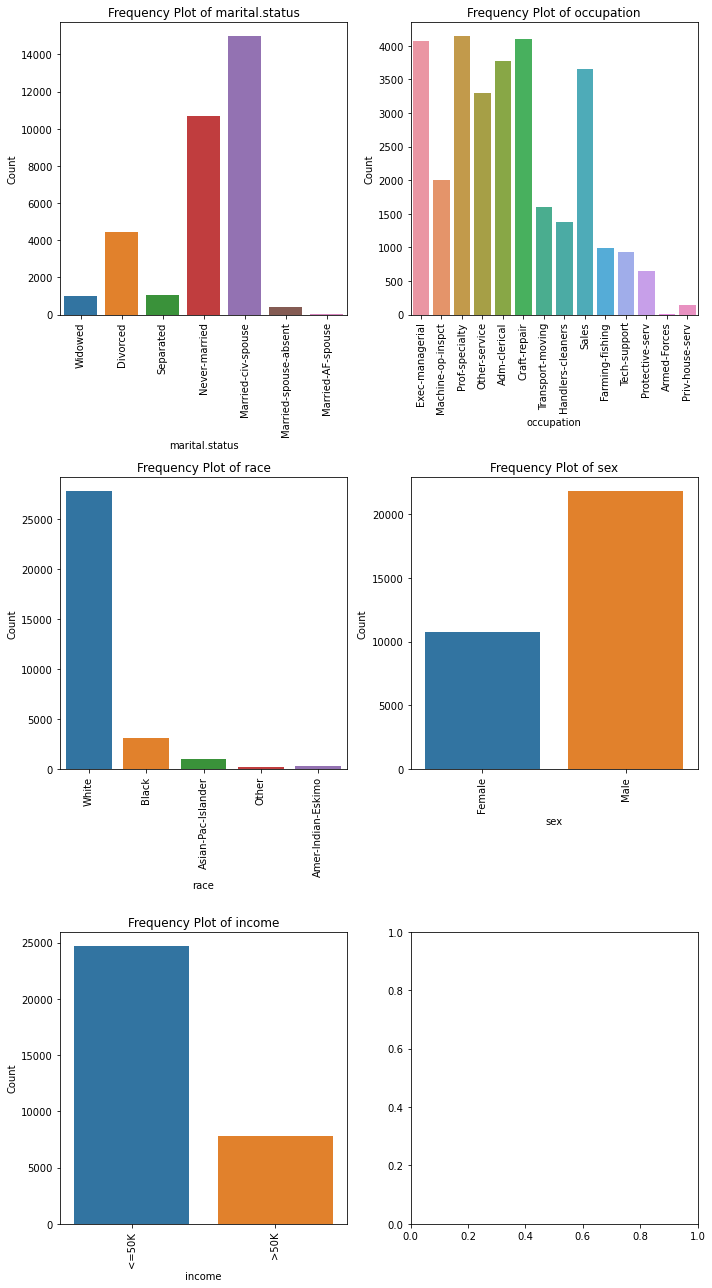

In [27]:
frequency_plots(dataset_name, class_variable, cols_for_freq_plots)

### 8.1. Interpretation of Frequency Plots

There are several inherently categorical variables in this dataset; their specific interpretations are as follows:

1) Again, the class variable is imbalanced. There are far many individuals who do not earn a higher income. 

2) Majority individuals are male

3) Majority individuals are white followed by black

4) Majority are married

5) The least number of occupations reported is that of the armed forces. 

In [28]:
def cat_cols():
    cat_cols = input('Enter column names separated by commas: ').split(', ')
    return cat_cols

In [29]:
categorical_cols = cat_cols()

Enter column names separated by commas: marital.status, sex


In [30]:
def binary_categorical_barplots(dataset_name, class_variable, categorical_cols):
    dataset = read_csv(dataset_name)
    num_plots = len(categorical_cols)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    if num_plots % 2 != 0:
        num_cols = 1
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))
    
    if num_rows > 1:  
        for idx, col in enumerate(categorical_cols):
            row_idx = idx // num_cols
            col_idx = idx % num_cols

            ax = axes[row_idx][col_idx]

            sns.countplot(x=col, hue=class_variable, data=dataset, ax=ax)
            ax.set_title(f'Bar Plot of {col} vs {class_variable}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=class_variable)
    else:  
        for idx, col in enumerate(categorical_cols):
            ax = axes[idx]

            sns.countplot(x=col, hue=class_variable, data=dataset, ax=ax)
            ax.set_title(f'Bar Plot of {col} vs {class_variable}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.legend(title=class_variable)
            
            ax.tick_params(axis='x', rotation=90)
        
    plt.tight_layout()
    plt.show()

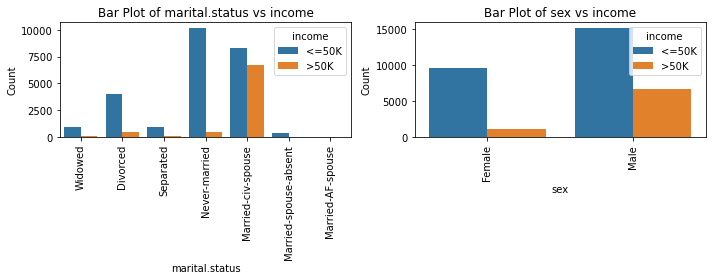

In [31]:
binary_categorical_barplots(dataset_name, class_variable, categorical_cols)

### 8.2. Interpretation of Categorical Bar Plots

For each of the variables of marital.status and sex, in each of their classes, majority individuals do not earn a high income. 

# 9. Scaling the data

Due to the values of balance being much larger than then rest of the explanatory variables, all the predictor variables have been scaled using the MinMaxScaler. 

In [32]:
def normalize_data(dataset_name, class_variable):
    processed_data = preprocess_data(dataset_name)
    
    X = processed_data.drop(columns=[class_variable])
    y = processed_data[class_variable]

    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    
    normalized_data = pd.concat([pd.DataFrame(X_normalized, columns=X.columns), y], axis=1)
    
    return normalized_data

In [33]:
normalize_data(dataset_name, class_variable)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,0.428571,0.043987,0.733333,0.533333,1.000000,0.692308,0.2,1.0,0.0,0.0,1.000000,0.397959,0.95,0
1,0.890411,0.428571,0.081896,0.733333,0.533333,1.000000,0.230769,0.2,1.0,0.0,0.0,1.000000,0.173469,0.95,0
2,0.671233,0.428571,0.118021,1.000000,0.600000,1.000000,0.692308,0.8,0.5,0.0,0.0,1.000000,0.397959,0.95,0
3,0.506849,0.428571,0.086982,0.333333,0.200000,0.000000,0.461538,0.8,1.0,0.0,0.0,0.895317,0.397959,0.95,0
4,0.328767,0.428571,0.171404,1.000000,0.600000,0.833333,0.692308,0.6,1.0,0.0,0.0,0.895317,0.397959,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.428571,0.202298,1.000000,0.600000,0.666667,0.769231,0.2,1.0,1.0,0.0,0.000000,0.397959,0.95,0
32557,0.136986,0.428571,0.166404,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.0,0.000000,0.377551,0.95,0
32558,0.315068,0.428571,0.096500,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.0,0.000000,0.397959,0.95,1
32559,0.561644,0.428571,0.094827,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.0,0.000000,0.397959,0.95,0


## 10. Correlation Analysis

In [34]:
def corr_heatmap(dataset_name, class_variable):
    corr_matrix = normalize_data(dataset_name, class_variable).corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
    
    plt.title('Correlation Heatmap')
    plt.show()


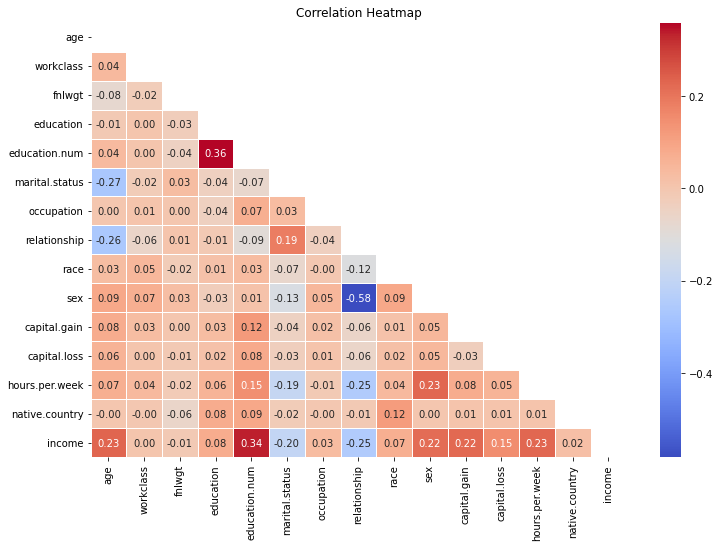

In [35]:
corr_heatmap(dataset_name, class_variable)

### 10.1. Interpretation of Correlation Heatmap

The observations from the correlation heatmap are as follows:

With the class variable, income, all the predictor variables have a weak to moderate correlation. Except for marital status and relationship, all other factors are positively related. 

For marital status and relationship, it is climbs the ladder in the hierarchy then it is likely that your real income decreases. Therefore, a negative relationship. 

As your hours per week increase, so does your income. The same goes for age. As one progresses in their career, it is likely for them to earn a higher income. 

## 11. Feature Selection 

Features have been selected through an approach using the correlations with the outcome variable. Those variables with absolute correlation between 0.2 and 1.0 with the outcome variable will be selected. Rest will be dropped. 

The idea is to choose variables with close to moderate to strong correlation with the class variable.

In [36]:
def feature_selection_by_corr(dataset_name, class_variable):
    corr_matrix = normalize_data(dataset_name, class_variable).corr()
    corr_with_target = corr_matrix[class_variable].drop(class_variable)

    ranked_features_df = pd.DataFrame({'Feature': corr_with_target.index, 'Correlation': corr_with_target.values})
    ranked_features_df.sort_values(by='Correlation', ascending=False, inplace=True)
    
    selected_features = ranked_features_df[(abs(ranked_features_df['Correlation']) >= 0.2) & (abs(ranked_features_df['Correlation']) <= 1.0)]['Feature'].tolist()
    
    return selected_features


In [37]:
feature_selection_by_corr(dataset_name, class_variable)

['education.num',
 'age',
 'hours.per.week',
 'capital.gain',
 'sex',
 'relationship']

In [38]:
def drop_unselected_features(dataset_name, class_variable):
    dataset = normalize_data(dataset_name, class_variable)
    
    selected_features = feature_selection_by_corr(dataset_name, class_variable)
    selected_dataset = dataset[selected_features + [class_variable]]

    return selected_dataset

In [39]:
drop_unselected_features(dataset_name, class_variable)

,education.num,age,hours.per.week,capital.gain,sex,relationship,income
0,0.533333,1.000000,0.397959,0.0,0.0,0.2,0
1,0.533333,0.890411,0.173469,0.0,0.0,0.2,0
2,0.600000,0.671233,0.397959,0.0,0.0,0.8,0
3,0.200000,0.506849,0.397959,0.0,0.0,0.8,0
4,0.600000,0.328767,0.397959,0.0,0.0,0.6,0
...,...,...,...,...,...,...,...
32556,0.600000,0.068493,0.397959,0.0,1.0,0.2,0
32557,0.733333,0.136986,0.377551,0.0,0.0,1.0,0
32558,0.533333,0.315068,0.397959,0.0,1.0,0.0,1
32559,0.533333,0.561644,0.397959,0.0,0.0,0.8,0


In [40]:
def dimensions2(dataset_name, class_variable):
    dim = drop_unselected_features(dataset_name, class_variable).shape
    return dim

In [41]:
dimensions2(dataset_name, class_variable)

(32561, 7)

This processed and feature selected data is what will be used for model training and evaluating from this point onwards. The data now has 32561 rows and 7 columns (6 predictor variables and 1 outcome variable).

## 12. Data Splits with selected features only

In [42]:
def tvt_splits_fs(dataset_name, class_variable):
    y = drop_unselected_features(dataset_name, class_variable)[[class_variable]]
    X = drop_unselected_features(dataset_name, class_variable).drop(columns = [class_variable])
    # X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(read_csv(data), target = class_variable, train_size=0.6, valid_size=0.2, test_size=0.2, random_state = None) 
    
    total_size = len(preprocess_data(dataset_name))
    train_size = int(total_size * 0.6)
    valid_size = int(total_size * 0.2)

    # Split the data
    X_train, y_train = drop_unselected_features(dataset_name, class_variable).iloc[:train_size, :-1], drop_unselected_features(dataset_name, class_variable).iloc[:train_size, -1]
    X_valid, y_valid = drop_unselected_features(dataset_name, class_variable).iloc[train_size:train_size+valid_size, :-1], drop_unselected_features(dataset_name, class_variable).iloc[train_size:train_size+valid_size, -1]
    X_test, y_test = drop_unselected_features(dataset_name, class_variable).iloc[train_size+valid_size:, :-1], drop_unselected_features(dataset_name, class_variable).iloc[train_size+valid_size:, -1]
    
    y_train = pd.Series(y_train).to_frame(name=class_variable)
    y_valid = pd.Series(y_valid).to_frame(name=class_variable)
    y_test = pd.Series(y_test).to_frame(name=class_variable)
    
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [43]:
def splits_tabulated_fs(dataset_name, class_variable):
    X_train, X_valid, X_test, y_train, y_valid, y_test = tvt_splits_fs(dataset_name, class_variable)
    
    dataframes = [X_train, X_valid, X_test, y_train, y_valid, y_test]

    dataframe_names = ['X_train', 'X_valid', 'X_test', 'y_train', 'y_valid', 'y_test']

    dataframe_shapes = {}
    for i, dataframe in enumerate(dataframes):
        dataframe_shapes[dataframe_names[i]] = dataframe.shape

    shape_train_test = pd.DataFrame.from_dict(dataframe_shapes, orient='index', columns=['Rows', 'Columns'])

    return shape_train_test

In [44]:
splits_tabulated_fs(dataset_name, class_variable)

,Rows,Columns
X_train,19536,6
X_valid,6512,6
X_test,6513,6
y_train,19536,1
y_valid,6512,1
y_test,6513,1


## 13. Applying and Evaluating model without CV

In [45]:
def model_without_CV(dataset_name, class_variable):
    X_train, X_valid, X_test, y_train, y_valid, y_test = tvt_splits_fs(dataset_name, class_variable)

    y_train = y_train.values.ravel()
    y_valid = y_valid.values.ravel()
    y_test = y_test.values.ravel()

    knn = KNeighborsClassifier(n_neighbors=5) 

    # Train
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)

    print('ROC for Train Set:')
    fpr_train, tpr_train, _ = roc_curve(y_train, knn.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Train Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Train Set Metrics:')
    print(classification_report(y_train, y_pred_train))
    
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    print(f'Train Precision: {precision_train:.4f}')
    print(f'Train Recall: {recall_train:.4f}')
    print(f'Train F1-score: {f1_train:.4f}')
    print(f'Train AUC: {auc_train:.4f}\n')

    # Valid
    y_pred_valid = knn.predict(X_valid)

    print('ROC for Validation Set:')
    fpr_valid, tpr_valid, _ = roc_curve(y_valid, knn.predict_proba(X_valid)[:, 1])
    auc_valid = roc_auc_score(y_valid, knn.predict_proba(X_valid)[:, 1])
    plt.plot(fpr_valid, tpr_valid, color='darkorange', lw=2, label=f'ROC curve (area = {auc_valid:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Validation Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Validation Set Metrics:')
    print(classification_report(y_valid, y_pred_valid))
    
    precision_valid = precision_score(y_valid, y_pred_valid)
    recall_valid = recall_score(y_valid, y_pred_valid)
    f1_valid = f1_score(y_valid, y_pred_valid)
    print(f'Validation Precision: {precision_valid:.4f}')
    print(f'Validation Recall: {recall_valid:.4f}')
    print(f'Validation F1-score: {f1_valid:.4f}')
    print(f'Validation AUC: {auc_valid:.4f}\n')

    # Test
    y_pred_test = knn.predict(X_test)

    print('ROC for Test Set:')
    fpr_test, tpr_test, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Test Set Metrics:')
    print(classification_report(y_test, y_pred_test))
    
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    print(f'Test Precision: {precision_test:.4f}')
    print(f'Test Recall: {recall_test:.4f}')
    print(f'Test F1-score: {f1_test:.4f}')
    print(f'Test AUC: {auc_test:.4f}')

ROC for Train Set:


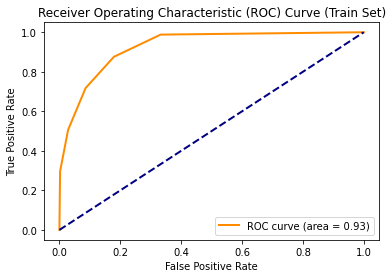

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     14188
           1       0.76      0.72      0.74      5348

    accuracy                           0.86     19536
   macro avg       0.83      0.82      0.82     19536
weighted avg       0.86      0.86      0.86     19536

Train Precision: 0.7590
Train Recall: 0.7173
Train F1-score: 0.7376
Train AUC: 0.9267

ROC for Validation Set:


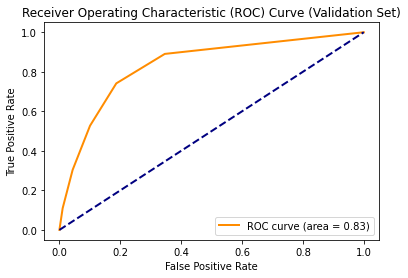

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5271
           1       0.55      0.53      0.54      1241

    accuracy                           0.83      6512
   macro avg       0.72      0.71      0.72      6512
weighted avg       0.83      0.83      0.83      6512

Validation Precision: 0.5524
Validation Recall: 0.5270
Validation F1-score: 0.5394
Validation AUC: 0.8338

ROC for Test Set:


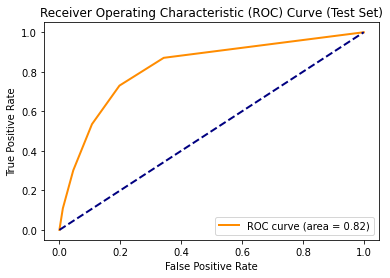

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5261
           1       0.54      0.54      0.54      1252

    accuracy                           0.82      6513
   macro avg       0.72      0.71      0.72      6513
weighted avg       0.82      0.82      0.82      6513

Test Precision: 0.5434
Test Recall: 0.5351
Test F1-score: 0.5392
Test AUC: 0.8216


In [46]:
model_without_CV(dataset_name, class_variable)

## 14. Applying and Evaluating Model with CV

In [47]:
def model_with_CV(dataset_name, class_variable):
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(drop_unselected_features(dataset_name, class_variable).drop(columns=[class_variable]), drop_unselected_features(dataset_name, class_variable)[class_variable], test_size=0.2, random_state=42)
    y_train_valid = pd.Series(y_train_valid).to_frame(name=class_variable)
    y_test = pd.Series(y_test).to_frame(name=class_variable)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    knn = KNeighborsClassifier(n_neighbors=5)
    k = 5

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    cv_scores = cross_val_score(knn, X_train_valid, y_train_valid.values.ravel(), cv=kf, scoring='accuracy')  # Example metric: accuracy
    best_score_index = cv_scores.argmax()
    best_knn = KNeighborsClassifier(n_neighbors=5) 
    best_knn.fit(X_train_valid, y_train_valid.values.ravel())

    y_pred_train = best_knn.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train.values.ravel(), best_knn.predict_proba(X_train)[:, 1])
    auc_train = roc_auc_score(y_train.values.ravel(), best_knn.predict_proba(X_train)[:, 1])
    
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='orange', lw=2, label=f'ROC curve (area = {auc_train:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Train Set)')
    plt.legend(loc='lower right')
    plt.show()
    
    print('Train Set Metrics:')
    train_report = classification_report(y_train.values.ravel(), y_pred_train)
    print(train_report)
    
    train_precision = precision_score(y_train.values.ravel(), y_pred_train, average='weighted')
    train_recall = recall_score(y_train.values.ravel(), y_pred_train, average='weighted')
    train_f1 = f1_score(y_train.values.ravel(), y_pred_train, average='weighted')
    print(f'Train Overall Precision: {train_precision:.4f}')
    print(f'Train Overall Recall: {train_recall:.4f}')
    print(f'Train Overall F1-score: {train_f1:.4f}\n')

    y_pred_valid = best_knn.predict(X_valid)
    fpr_valid, tpr_valid, _ = roc_curve(y_valid.values.ravel(), best_knn.predict_proba(X_valid)[:, 1])
    auc_valid = roc_auc_score(y_valid.values.ravel(), best_knn.predict_proba(X_valid)[:, 1])

    plt.figure()
    plt.plot(fpr_valid, tpr_valid, color='orange', lw=2, label=f'ROC curve (area = {auc_valid:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Validation Set)')
    plt.legend(loc='lower right')
    plt.show()

    print('Validation Set Metrics:')
    valid_report = classification_report(y_valid.values.ravel(), y_pred_valid)
    print(valid_report)

    valid_precision = precision_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    valid_recall = recall_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    valid_f1 = f1_score(y_valid.values.ravel(), y_pred_valid, average='weighted')
    print(f'Validation Overall Precision: {valid_precision:.4f}')
    print(f'Validation Overall Recall: {valid_recall:.4f}')
    print(f'Validation Overall F1-score: {valid_f1:.4f}\n')

    y_pred_test = best_knn.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test.values.ravel(), best_knn.predict_proba(X_test)[:, 1])
    auc_test = roc_auc_score(y_test.values.ravel(), best_knn.predict_proba(X_test)[:, 1])

    plt.figure()
    plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'ROC curve (area = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Test Set)')
    plt.legend(loc='lower right')
    plt.show()

    print('Test Set Metrics:')
    test_report = classification_report(y_test.values.ravel(), y_pred_test)
    print(test_report)
    
    test_precision = precision_score(y_test.values.ravel(), y_pred_test, average='weighted')
    test_recall = recall_score(y_test.values.ravel(), y_pred_test, average='weighted')
    test_f1 = f1_score(y_test.values.ravel(), y_pred_test, average='weighted')
    print(f'Test Overall Precision: {test_precision:.4f}')
    print(f'Test Overall Recall: {test_recall:.4f}')
    print(f'Test Overall F1-score: {test_f1:.4f}')

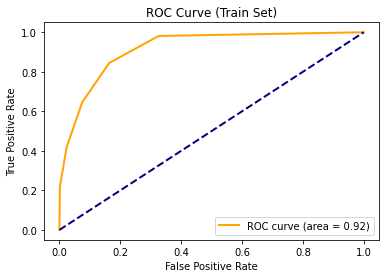

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     14828
           1       0.73      0.65      0.69      4708

    accuracy                           0.86     19536
   macro avg       0.81      0.79      0.80     19536
weighted avg       0.85      0.86      0.85     19536

Train Overall Precision: 0.8532
Train Overall Recall: 0.8577
Train Overall F1-score: 0.8546



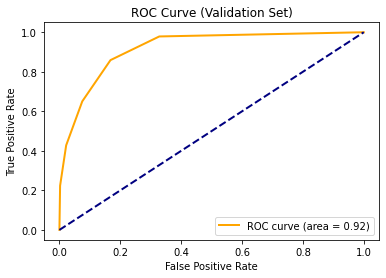

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4916
           1       0.74      0.65      0.69      1596

    accuracy                           0.86      6512
   macro avg       0.81      0.79      0.80      6512
weighted avg       0.85      0.86      0.85      6512

Validation Overall Precision: 0.8532
Validation Overall Recall: 0.8576
Validation Overall F1-score: 0.8545



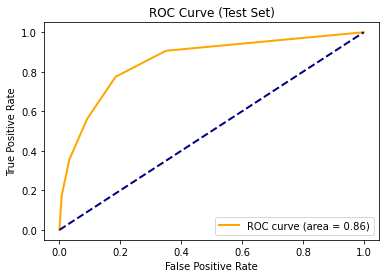

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4976
           1       0.66      0.56      0.61      1537

    accuracy                           0.83      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513

Test Overall Precision: 0.8197
Test Overall Recall: 0.8270
Test Overall F1-score: 0.8222


In [48]:
model_with_CV(dataset_name, class_variable)

## 15. Summary of Model Results

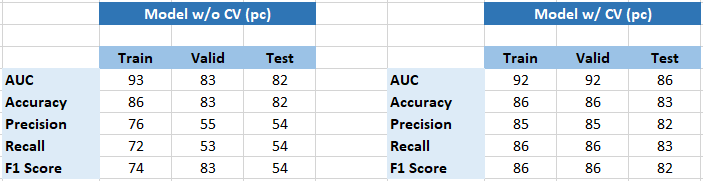

### 15.1. Interpretation with more focus on With CV Test Set metrics

First observation is that the model performs well in the training set and subsequently the performance deteriorates in the validation and test sets. 

Second, it is clear that cross validation has helped improve the model performance. 

Metrics of accuracy, recall, precision, f1-score and AUC will be explained through the with CV Test set numbers as follows:

1) **Accuracy:** The model correctly predicts individuals who either earn and don't earn a high income 83% of the time. Although this is good accuracy, it may be misleading because of class variable is imbalanced. Majority individuals did not earn a high income. 

2) **Recall:** The overall recall is 83%. However, the recall for earning a high income is 56% which means that of all actual high income individuals in the test set, the model correctly predicted 56% of them and missed 44%. 

3) **Precision:** The overall precision was 82% but the precision for class 1 is 66%. This means that of all the instances predicted as earning a high income, 66% of them actually did earn a high income. 

4) **F1-Score:** The overall f1-score is 82% but for the class 1 it is 61% which implies that the accuracy of predicting a high income earner is better than moderate.  

5) **AUC:** The probability that the model predicts a high income earner than a not is 86%. 

Note: Of each of the 0,1 classes of the outcome variable, the higher percentage rested with the 0 class owing to the imbalance in the column.

## 16. Compiled Master Function

In [49]:
def master_function():
    dataset_name = input('Name of the dataset: ')
    data = read_csv(dataset_name)
    print(dimensions(dataset_name))
    print(data_types(dataset_name))
    preprocess_data(dataset_name)
    print(missing_vals(dataset_name))
    print(descr(dataset_name))
    extract_numeric_cols(dataset_name)
    boxplots(dataset_name)
    print(boxplot_stats(dataset_name))
    class_variable = class_var_name()
    def cols_for_freq_plots():
        columns_list = input('Enter column names separated by commas: ').split(', ')
        return columns_list
    cols_for_freq_plots = cols_for_freq_plots()
    frequency_plots(dataset_name, class_variable, cols_for_freq_plots)
    def cat_cols():
        cat_cols = input('Enter column names separated by commas: ').split(', ')
        return cat_cols
    categorical_cols = cat_cols()
    binary_categorical_barplots(dataset_name, class_variable, categorical_cols)
    normalize_data(dataset_name, class_variable)
    corr_heatmap(dataset_name, class_variable)
    feature_selection_by_corr(dataset_name, class_variable)
    drop_unselected_features(dataset_name, class_variable)
    dimensions2(dataset_name, class_variable)
    tvt_splits_fs(dataset_name, class_variable)
    print(splits_tabulated_fs(dataset_name, class_variable))
    model_without_CV(dataset_name, class_variable)
    model_with_CV(dataset_name, class_variable)

Name of the dataset: high_income.csv
(32561, 15)
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
            age workclass      fnlwgt education education.num marital.status  \
count  32561.00  32561.00    32561.00  32561.00      32561.00       32561.00   
mean      38.58      3.09   189778.37     10.30         10.08           2.61   
std      

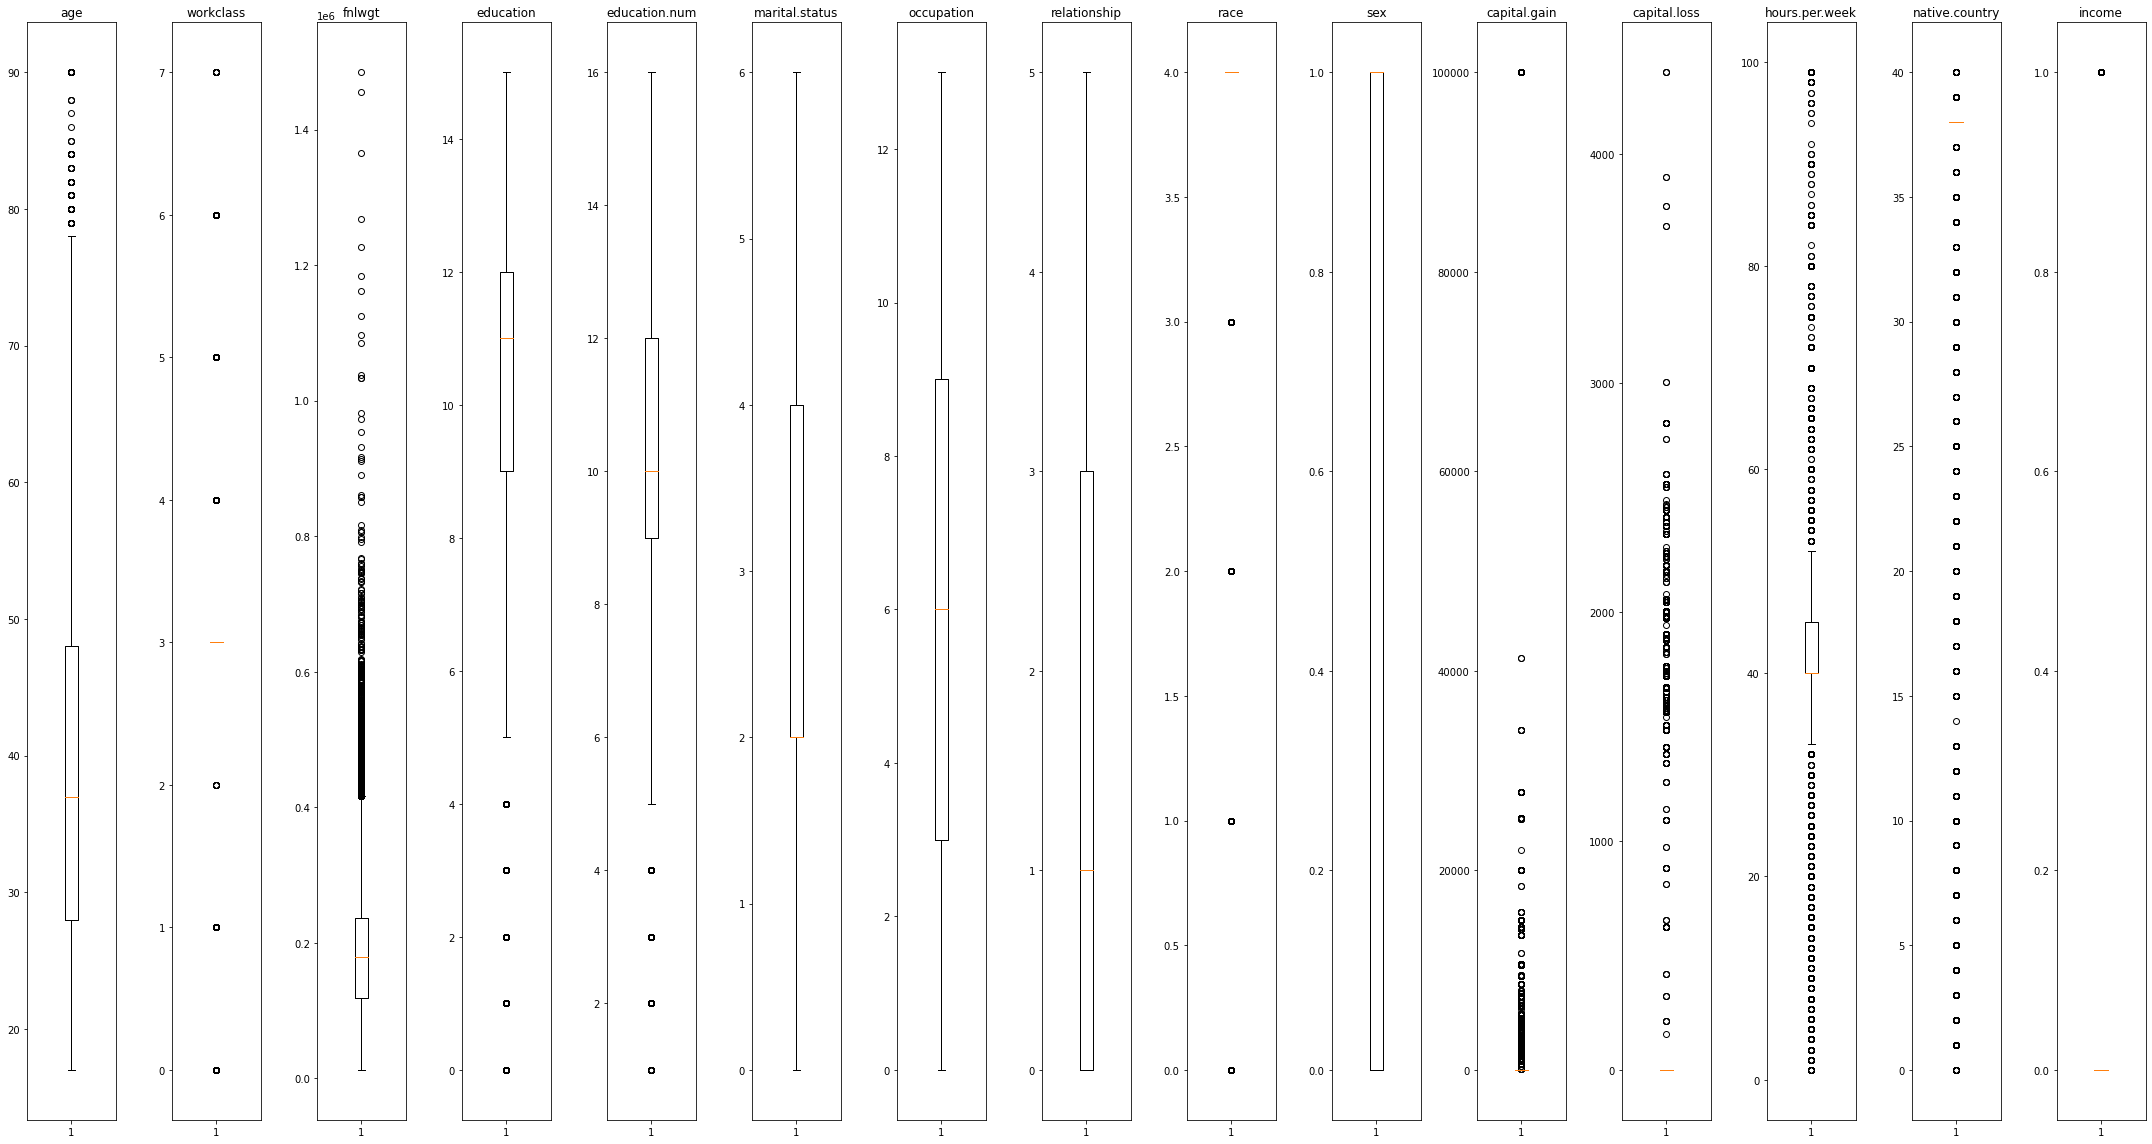

               whisker_low       min         q1         q2         q3  \
column_name                                                             
age                  -2.00     17.00      28.00      37.00      48.00   
workclass             3.00      0.00       3.00       3.00       3.00   
fnlwgt           -61009.00  12285.00  117827.00  178356.00  237051.00   
education             4.50      0.00       9.00      11.00      12.00   
education.num         4.50      1.00       9.00      10.00      12.00   
marital.status       -1.00      0.00       2.00       2.00       4.00   
occupation           -6.00      0.00       3.00       6.00       9.00   
relationship         -4.50      0.00       0.00       1.00       3.00   
race                  4.00      0.00       4.00       4.00       4.00   
sex                  -1.50      0.00       0.00       1.00       1.00   
capital.gain          0.00      0.00       0.00       0.00       0.00   
capital.loss          0.00      0.00       0.00    

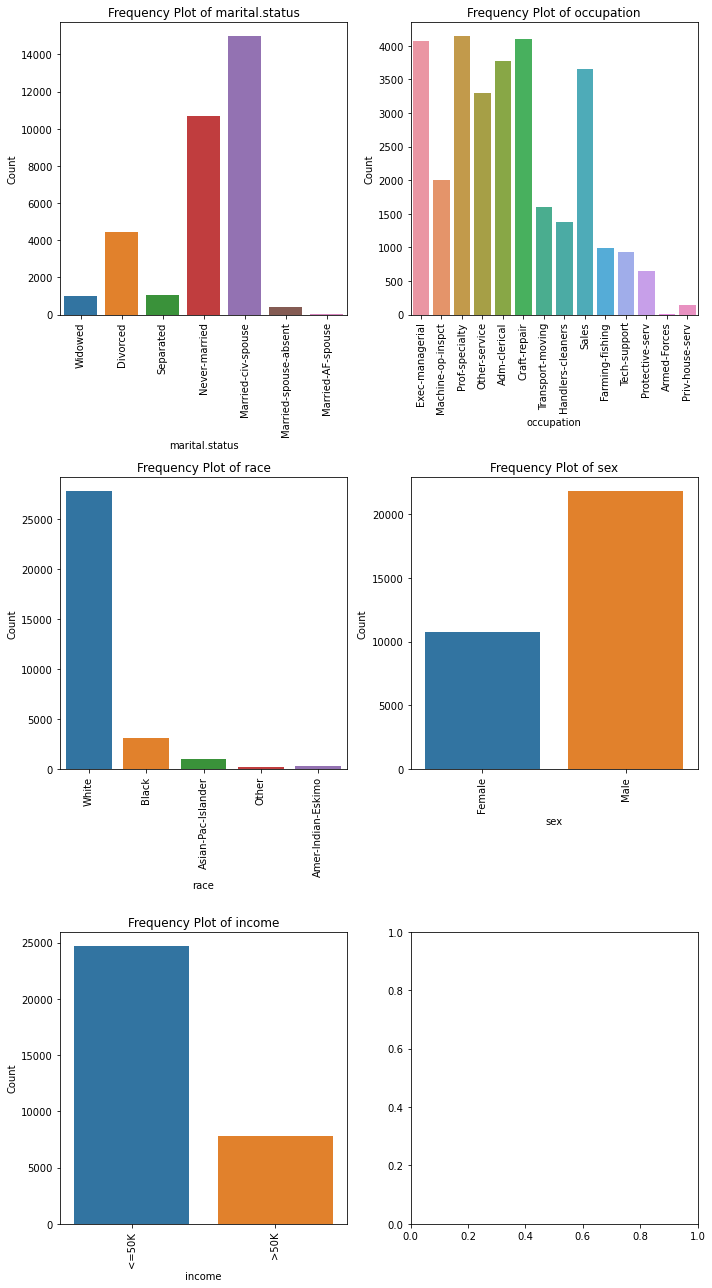

Enter column names separated by commas: marital.status, sex


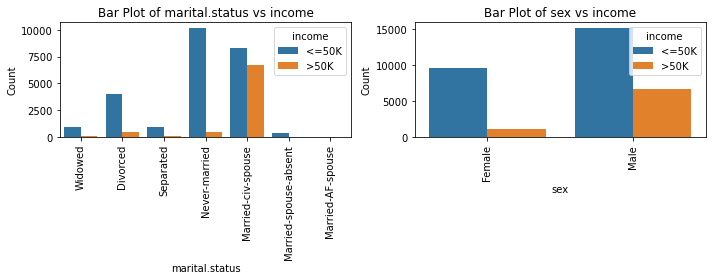

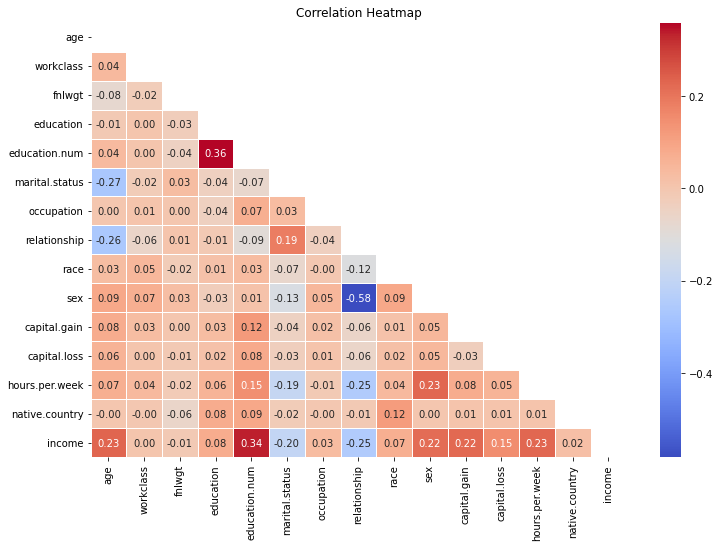

          Rows  Columns
X_train  19536        6
X_valid   6512        6
X_test    6513        6
y_train  19536        1
y_valid   6512        1
y_test    6513        1
ROC for Train Set:


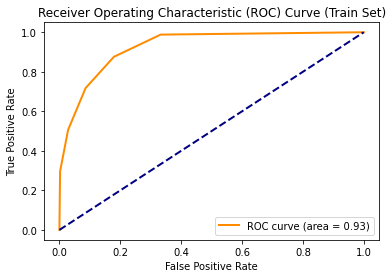

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     14188
           1       0.76      0.72      0.74      5348

    accuracy                           0.86     19536
   macro avg       0.83      0.82      0.82     19536
weighted avg       0.86      0.86      0.86     19536

Train Precision: 0.7590
Train Recall: 0.7173
Train F1-score: 0.7376
Train AUC: 0.9267

ROC for Validation Set:


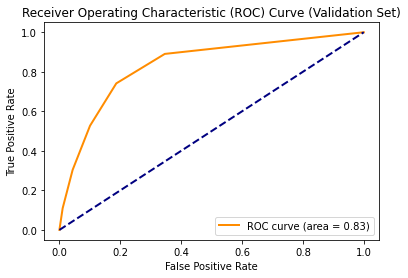

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5271
           1       0.55      0.53      0.54      1241

    accuracy                           0.83      6512
   macro avg       0.72      0.71      0.72      6512
weighted avg       0.83      0.83      0.83      6512

Validation Precision: 0.5524
Validation Recall: 0.5270
Validation F1-score: 0.5394
Validation AUC: 0.8338

ROC for Test Set:


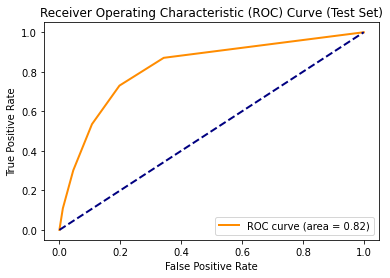

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5261
           1       0.54      0.54      0.54      1252

    accuracy                           0.82      6513
   macro avg       0.72      0.71      0.72      6513
weighted avg       0.82      0.82      0.82      6513

Test Precision: 0.5434
Test Recall: 0.5351
Test F1-score: 0.5392
Test AUC: 0.8216


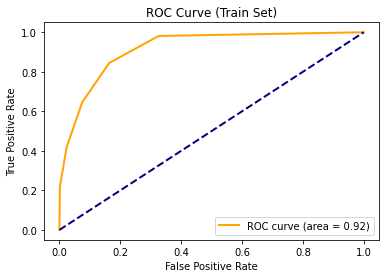

Train Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     14828
           1       0.73      0.65      0.69      4708

    accuracy                           0.86     19536
   macro avg       0.81      0.79      0.80     19536
weighted avg       0.85      0.86      0.85     19536

Train Overall Precision: 0.8532
Train Overall Recall: 0.8577
Train Overall F1-score: 0.8546



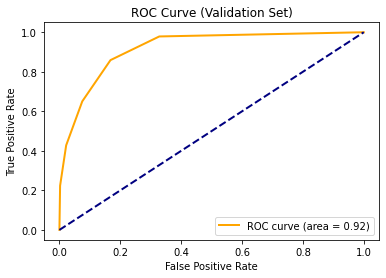

Validation Set Metrics:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4916
           1       0.74      0.65      0.69      1596

    accuracy                           0.86      6512
   macro avg       0.81      0.79      0.80      6512
weighted avg       0.85      0.86      0.85      6512

Validation Overall Precision: 0.8532
Validation Overall Recall: 0.8576
Validation Overall F1-score: 0.8545



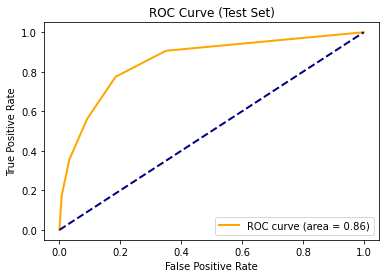

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4976
           1       0.66      0.56      0.61      1537

    accuracy                           0.83      6513
   macro avg       0.76      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513

Test Overall Precision: 0.8197
Test Overall Recall: 0.8270
Test Overall F1-score: 0.8222


In [50]:
master_function()